### Importing the required Libraries

In [1]:
import errno, os
import requests
import scipy.io as sio
import numpy as np

from os import listdir
from os.path import isfile, join


### State Of Bearings

♦ N for normal state, not damaged

♦ B for ball damaged

♦ IR for inner raceway damage

♦ OR for outer raceway damage


### Fault Diameter -

♦ 007 for 0.007 inch or 7 mils damage

♦ 014 for 0.014 inch damage

♦ 021 for 0.021 inch damage

♦ 028 for 0.028 inch damage


### Position of the sensor

♦ 3, 6, 12 for OUTER RACEWAY faults located at 3 o’clock, at 6 o’clock and at 12 o’clock respectively of the load zone

♦ Load can be:
  0, 1, 2, 3 for different motor load conditions in Horsepower (HP)

♦ Using the data collected at the Drive End, which is labeled as the code DE, The Below Function picks up the time signal from a  file.

♦ For the given code, a regex is made on the dictionary keys, looking for the the Code(DE) and ignoring the rest of the suffix.

♦ The function also converts the unit to SI.

In [2]:
def acceleration_time_signal(dict_1, code):                                 # data=dict1
    """
    load the time series in the file and convert units in SI
    file= 'filename' from the ./dataset/ folder
    code= ' DE' or 'FE', other code will give error
    """
    import re
    try:
        for key in dict_1:
            if re.findall(rf"({code})", key):
                dict_code = key
        #inches to meter
        unit_conv = 0.0254
        x = dict_1[dict_code] * unit_conv
        return x
    except:
        print('File does not exist or code wrong. Code must be either "DE or "FE" ')

In [3]:
def Read_MAT_files_from_folders(file_path, files_list, code):
  
  G_data = []
  
  for i in range(len(files_list)):
      data = sio.loadmat(os.path.join(file_path, files_list[i]))           #Joining file path with file name
      print(file_path, files_list[i])                                      #print(data)
      sig = acceleration_time_signal(data, code)                           #Printing the signal from accelerometers
      G_data.append(sig)
  
  G_data = np.vstack(G_data).flatten()                                     #Stacking all our input arrays vertically
  
  return G_data 

In [4]:
def Percent_train_test_split(array_1, percent = 10):                 # For splititng the data we define a function with 10% test and 90%train
  len_n = len(array_1)                                         
  percent_true = percent/100
  #print(percent_true)
  x = int(percent_true*len_n) #% split
  data_test, data_train = np.split(array_1, [x+1])

  return data_train, data_test

In [5]:
def fast_scandir(dirname):                                                  #For printing all the subfolders in the given directory which is reffered to as path
    subfolders= [f.path for f in os.scandir(dirname) if f.is_dir()]
    for dirname in list(subfolders):
        subfolders.extend(fast_scandir(dirname))
    return subfolders 

### Checking Out if the above functions work(Using Normal data-DE)

In [6]:
#12k Normal Signal for DE

file_path_1 = r'C:\Users\Lenovo\Desktop\CWRU_NEW\CWRU-dataset-main\Normal'
onlyfiles_1 = [f for f in listdir(file_path_1) if isfile(join(file_path_1, f))]
#print(onlyfiles_1)

G_data_N_DE = Read_MAT_files_from_folders(file_path_1, onlyfiles_1, "DE")

display(G_data_N_DE.shape)

C:\Users\Lenovo\Desktop\CWRU_NEW\CWRU-dataset-main\Normal 100_Normal_3.mat
C:\Users\Lenovo\Desktop\CWRU_NEW\CWRU-dataset-main\Normal 97_Normal_0.mat
C:\Users\Lenovo\Desktop\CWRU_NEW\CWRU-dataset-main\Normal 98_Normal_1.mat
C:\Users\Lenovo\Desktop\CWRU_NEW\CWRU-dataset-main\Normal 99_Normal_2.mat


(1698547,)

### Using 12k Hz  Data from the DE

The Same as usual there are 3 types of fault as follows

♦ B,

♦ IR,

♦ OR


In [7]:
file_path_2 = r'C:\Users\Lenovo\Desktop\CWRU_NEW\CWRU-dataset-main\12k_Drive_End_Bearing_Fault_Data' #12k Hz data path

subfolder_path = fast_scandir(file_path_2)                                                        # Spits out all the subfolders of the directory whose path is mentioned above

In [8]:
subfolder_path

['C:\\Users\\Lenovo\\Desktop\\CWRU_NEW\\CWRU-dataset-main\\12k_Drive_End_Bearing_Fault_Data\\B',
 'C:\\Users\\Lenovo\\Desktop\\CWRU_NEW\\CWRU-dataset-main\\12k_Drive_End_Bearing_Fault_Data\\IR',
 'C:\\Users\\Lenovo\\Desktop\\CWRU_NEW\\CWRU-dataset-main\\12k_Drive_End_Bearing_Fault_Data\\OR',
 'C:\\Users\\Lenovo\\Desktop\\CWRU_NEW\\CWRU-dataset-main\\12k_Drive_End_Bearing_Fault_Data\\B\\007',
 'C:\\Users\\Lenovo\\Desktop\\CWRU_NEW\\CWRU-dataset-main\\12k_Drive_End_Bearing_Fault_Data\\B\\014',
 'C:\\Users\\Lenovo\\Desktop\\CWRU_NEW\\CWRU-dataset-main\\12k_Drive_End_Bearing_Fault_Data\\B\\021',
 'C:\\Users\\Lenovo\\Desktop\\CWRU_NEW\\CWRU-dataset-main\\12k_Drive_End_Bearing_Fault_Data\\B\\028',
 'C:\\Users\\Lenovo\\Desktop\\CWRU_NEW\\CWRU-dataset-main\\12k_Drive_End_Bearing_Fault_Data\\IR\\007',
 'C:\\Users\\Lenovo\\Desktop\\CWRU_NEW\\CWRU-dataset-main\\12k_Drive_End_Bearing_Fault_Data\\IR\\014',
 'C:\\Users\\Lenovo\\Desktop\\CWRU_NEW\\CWRU-dataset-main\\12k_Drive_End_Bearing_Fault_Data\\

In [9]:

file_path_2 = r'C:\Users\Lenovo\Desktop\CWRU_NEW\CWRU-dataset-main\12k_Drive_End_Bearing_Fault_Data'               #12k Hz data path
subfolder_path = fast_scandir(file_path_2)                                                    # Spits out all the subfolders of the directory whose path is mentioned above

G_data_OR_007_DE = []
G_data_OR_021_DE = []

for i in range(3, len(subfolder_path), 1):                                                    # Range starts from 3 as first three files are the outer directory i.e. B,I.R and O.R.
    dir_1 = subfolder_path[i]                                                                   # We slice out each subfolder individually
  
    

#Ball-Faults Start    

#Ball faults(All the ball faults thats 4 different inches faults and in those 4 different inches each folder has 4 different folders corresponding to the load applies)  
  
    if '\B' in dir_1:
    
        onlyfiles_2_1 = [f for f in listdir(dir_1) if isfile(join(dir_1, f))]                    #All the files in the B directory is listed out
    

        if '007' in dir_1:                                                                       #007 fault
    
            G_data_B_007_DE = Read_MAT_files_from_folders(dir_1, onlyfiles_2_1, "DE")
        
        elif '014' in dir_1:                                                                     #014 fault                                                                   
    
            G_data_B_014_DE = Read_MAT_files_from_folders(dir_1, onlyfiles_2_1, "DE")
        
        elif '021' in dir_1:                                                                    #021 fault
    
            G_data_B_021_DE = Read_MAT_files_from_folders(dir_1, onlyfiles_2_1, "DE")
        
        else:
    
            G_data_B_028_DE = Read_MAT_files_from_folders(dir_1, onlyfiles_2_1, "DE")             #028 fault
  

#Ball-Faults End
  
#Inner Race fault Start

    elif '\IR' in dir_1:
        
        onlyfiles_2_2 = [f for f in listdir(dir_1) if isfile(join(dir_1, f))]              #All the files in IR directory is listed
    

        if '007' in dir_1:                                                                 #007 fault
    
            G_data_IR_007_DE = Read_MAT_files_from_folders(dir_1, onlyfiles_2_2, "DE")
        
        elif '014' in dir_1:                                                               #014 fault
    
            G_data_IR_014_DE = Read_MAT_files_from_folders(dir_1, onlyfiles_2_2, "DE")
        
        elif '021' in dir_1:                                                               #021 fault
    
            G_data_IR_021_DE = Read_MAT_files_from_folders(dir_1, onlyfiles_2_2, "DE")
        
        else:
    
            G_data_IR_028_DE = Read_MAT_files_from_folders(dir_1, onlyfiles_2_2, "DE")       #028 fault

#Inner Race fault End

#Outer Race fault start
    
    elif '\OR' in dir_1:
        
        onlyfiles_2_3 = [f for f in listdir(dir_1) if isfile(join(dir_1, f))]            #All the files in OR directory is listed
    
        if '007' in dir_1:                                           
      
            for i in range(len(onlyfiles_2_3)):
                data_OR_007 = sio.loadmat(os.path.join(dir_1, onlyfiles_2_3[i]))
        #print(dir_1, onlyfiles_2_3[i])
                or_sig_007 = acceleration_time_signal(data_OR_007, code='DE')
                G_data_OR_007_DE.append(or_sig_007)
        elif '014' in dir_1:
      #014
      #print(dir_1)
            G_data_OR_014_DE = Read_MAT_files_from_folders(dir_1, onlyfiles_2_3, "DE")
        else:
      #021
            for i in range(len(onlyfiles_2_3)):
        #print(dir_1, onlyfiles_2_3[i])
                data_OR_021 = sio.loadmat(os.path.join(dir_1, onlyfiles_2_3[i]))
                or_sig_021 = acceleration_time_signal(data_OR_021, code='DE')
                G_data_OR_021_DE.append(or_sig_021)
  #OR 

print("G_data_B_007_DE", G_data_B_007_DE.shape)
print("G_data_B_014_DE", np.shape(G_data_B_014_DE))
print("G_data_B_021_DE", G_data_B_021_DE.shape)
print("G_data_B_028_DE", G_data_B_028_DE.shape)

print("G_data_IR_007_DE", G_data_IR_007_DE.shape)
print("G_data_IR_014_DE", np.shape(G_data_IR_014_DE))
print("G_data_IR_021_DE", G_data_IR_021_DE.shape)
print("G_data_IR_028_DE", G_data_IR_028_DE.shape)

G_data_OR_007_DE = np.vstack(G_data_OR_007_DE).flatten()
print("G_data_OR_007_DE", G_data_OR_007_DE.shape)
G_data_OR_014_DE = np.vstack(G_data_OR_014_DE).flatten()
print("G_data_OR_014_DE", np.shape(G_data_OR_014_DE))
G_data_OR_021_DE = np.vstack(G_data_OR_021_DE).flatten()
print("G_data_OR_021_DE", G_data_OR_021_DE.shape)     

C:\Users\Lenovo\Desktop\CWRU_NEW\CWRU-dataset-main\12k_Drive_End_Bearing_Fault_Data\B\007 118_0.mat
C:\Users\Lenovo\Desktop\CWRU_NEW\CWRU-dataset-main\12k_Drive_End_Bearing_Fault_Data\B\007 119_1.mat
C:\Users\Lenovo\Desktop\CWRU_NEW\CWRU-dataset-main\12k_Drive_End_Bearing_Fault_Data\B\007 120_2.mat
C:\Users\Lenovo\Desktop\CWRU_NEW\CWRU-dataset-main\12k_Drive_End_Bearing_Fault_Data\B\007 121_3.mat
C:\Users\Lenovo\Desktop\CWRU_NEW\CWRU-dataset-main\12k_Drive_End_Bearing_Fault_Data\B\014 185_0.mat
C:\Users\Lenovo\Desktop\CWRU_NEW\CWRU-dataset-main\12k_Drive_End_Bearing_Fault_Data\B\014 186_1.mat
C:\Users\Lenovo\Desktop\CWRU_NEW\CWRU-dataset-main\12k_Drive_End_Bearing_Fault_Data\B\014 187_2.mat
C:\Users\Lenovo\Desktop\CWRU_NEW\CWRU-dataset-main\12k_Drive_End_Bearing_Fault_Data\B\014 188_3.mat
C:\Users\Lenovo\Desktop\CWRU_NEW\CWRU-dataset-main\12k_Drive_End_Bearing_Fault_Data\B\021 222_0.mat
C:\Users\Lenovo\Desktop\CWRU_NEW\CWRU-dataset-main\12k_Drive_End_Bearing_Fault_Data\B\021 223_1.mat


### Separate 10% from DE

B,
IR,
OR
10% split Train and Test. 10% - 90% split. 10% from each class for all 10 classes

In [10]:
                                                #Normal

G_data_N_DE_train, G_data_N_DE_test = Percent_train_test_split(G_data_N_DE, percent = 10) 
print("G_data_N_DE_train", G_data_N_DE_train.shape)
print("G_data_N_DE_test", G_data_N_DE_test.shape)

                                               #Ball Fault
    
G_data_B_007_DE_train, G_data_B_007_DE_test = Percent_train_test_split(G_data_B_007_DE, percent = 10) 
print("G_data_B_007_DE_train", G_data_B_007_DE_train.shape)
print("G_data_B_007_DE_test", G_data_B_007_DE_test.shape)

G_data_B_014_DE_train, G_data_B_014_DE_test = Percent_train_test_split(G_data_B_014_DE, percent = 10) 
print("G_data_B_014_DE_train", G_data_B_014_DE_train.shape)
print("G_data_B_014_DE_test", G_data_B_014_DE_test.shape)

G_data_B_021_DE_train, G_data_B_021_DE_test = Percent_train_test_split(G_data_B_021_DE, percent = 10) 
print("G_data_B_021_DE_train", G_data_B_021_DE_train.shape)
print("G_data_B_021_DE_test", G_data_B_021_DE_test.shape)

                                                #Inner Race Fault

G_data_IR_007_DE_train, G_data_IR_007_DE_test = Percent_train_test_split(G_data_IR_007_DE, percent = 10) 
print("G_data_IR_007_DE_train", G_data_IR_007_DE_train.shape)
print("G_data_IR_007_DE_test", G_data_IR_007_DE_test.shape)

G_data_IR_014_DE_train, G_data_IR_014_DE_test = Percent_train_test_split(G_data_IR_014_DE, percent = 10) 
print("G_data_IR_014_DE_train", G_data_IR_014_DE_train.shape)
print("G_data_IR_014_DE_test", G_data_IR_014_DE_test.shape)

G_data_IR_021_DE_train, G_data_IR_021_DE_test = Percent_train_test_split(G_data_IR_021_DE, percent = 10) 
print("G_data_IR_021_DE_train", G_data_IR_021_DE_train.shape)
print("G_data_IR_021_DE_test", G_data_IR_021_DE_test.shape)

                                               #Outer Race Fault
    
G_data_OR_007_DE_train, G_data_OR_007_DE_test = Percent_train_test_split(G_data_OR_007_DE, percent = 10) 
print("G_data_OR_007_DE_train", G_data_OR_007_DE_train.shape)
print("G_data_OR_007_DE_test", G_data_OR_007_DE_test.shape)

G_data_OR_014_DE_train, G_data_OR_014_DE_test = Percent_train_test_split(G_data_OR_014_DE, percent = 10) 
print("G_data_OR_014_DE_train", G_data_OR_014_DE_train.shape)
print("G_data_OR_014_DE_test", G_data_OR_014_DE_test.shape)

G_data_OR_021_DE_train, G_data_OR_021_DE_test = Percent_train_test_split(G_data_OR_021_DE, percent = 10) 
print("G_data_OR_021_DE_train", G_data_OR_021_DE_train.shape)
print("G_data_OR_021_DE_test", G_data_OR_021_DE_test.shape)

G_data_N_DE_train (1528692,)
G_data_N_DE_test (169855,)
G_data_B_007_DE_train (438383,)
G_data_B_007_DE_test (48710,)
G_data_B_014_DE_train (439298,)
G_data_B_014_DE_test (48811,)
G_data_B_021_DE_train (439167,)
G_data_B_021_DE_test (48797,)
G_data_IR_007_DE_train (439478,)
G_data_IR_007_DE_test (48831,)
G_data_IR_014_DE_train (438515,)
G_data_IR_014_DE_test (48724,)
G_data_IR_021_DE_train (438776,)
G_data_IR_021_DE_test (48753,)
G_data_OR_007_DE_train (1318545,)
G_data_OR_007_DE_test (146506,)
G_data_OR_014_DE_train (439037,)
G_data_OR_014_DE_test (48782,)
G_data_OR_021_DE_train (1318938,)
G_data_OR_021_DE_test (146549,)


###  G data for a single file IR DE data(Checking IR 007 only)
♦ It is a python dictionary with keys where code is the sensor position and can be:

1. DE if the data comes from the sensor at the Drive End of the motor
2. FE if the data comes from the sensor at the Fan End of the engine


♦ We are considering ''IR 007 ''Fault to just inspect how our data is represented in the form of dictionary

In [11]:
for i in range(3, len(subfolder_path), 1):
  dir_1 = subfolder_path[i]                                                         #path of 12k drive end data is subfolder path which has all the subfloders in it

  if '\IR' in dir_1:
    onlyfiles = [f for f in listdir(dir_1) if isfile(join(dir_1, f))]               #Giving out all the folder names of matlab files
    
    if '007' in dir_1:                                                               #007  fault
    
      
    
      data = sio.loadmat(os.path.join(dir_1, onlyfiles[0]))
      print(dir_1, onlyfiles[0])
      print("MAT File content: ", data)
        
      G_data = acceleration_time_signal(data, code='DE')
      print("Just the G data: ", G_data)
      

C:\Users\Lenovo\Desktop\CWRU_NEW\CWRU-dataset-main\12k_Drive_End_Bearing_Fault_Data\IR\007 105_0.mat
MAT File content:  {'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Mon Jan 31 13:49:59 2000', '__version__': '1.0', '__globals__': [], 'X105_DE_time': array([[-0.08300435],
       [-0.19573433],
       [ 0.23341928],
       ...,
       [-0.31642363],
       [-0.06367457],
       [ 0.26736822]]), 'X105_FE_time': array([[-0.40207455],
       [-0.00472545],
       [-0.10663091],
       ...,
       [ 0.31598909],
       [ 0.35091636],
       [ 0.03307818]]), 'X105_BA_time': array([[ 0.06466148],
       [-0.02309626],
       [-0.08852226],
       ...,
       [ 0.09648926],
       [ 0.08405591],
       [-0.02015893]]), 'X105RPM': array([[1797]], dtype=uint16)}
Just the G data:  [[-0.00210831]
 [-0.00497165]
 [ 0.00592885]
 ...
 [-0.00803716]
 [-0.00161733]
 [ 0.00679115]]


### Plot

♦ Some signals are plotted for the position code = DE.

♦ This is the train data. The data is sampled at 12kHz, that is 12000 data points per second. 

♦ Plot is done for 1/10 or 10% of 1 second:

#### ♦ We have took the train data set of Normal bearing without any fault,B007 fault,IR007 fault and OR007 fault and visuaise how acceleration data is is recorded at the drive end

♦ We have also took only 1200 samples for visualisation from each group

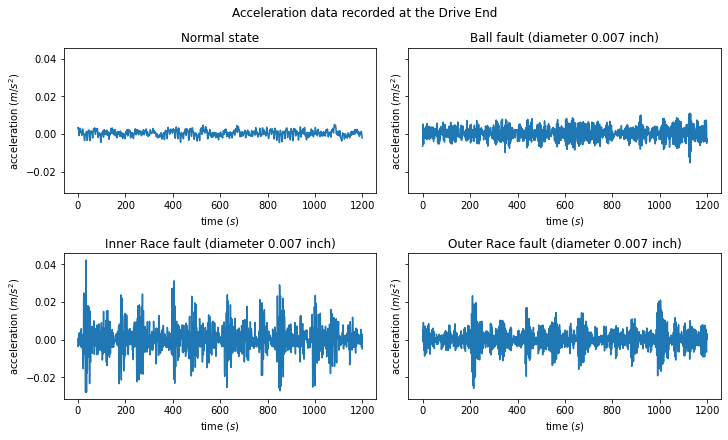

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

range_of_samples = range(0,1200)                    #As stated above taking 1/10 of the second therfore range is 1200

# plotting
fig, axs = plt.subplots(2, 2, sharey=True, figsize=(10, 6), constrained_layout=True)
fig.suptitle('Acceleration data recorded at the Drive End')

axs[0, 0].plot(G_data_N_DE_train[range_of_samples])
axs[0, 0].set_title('Normal state')

axs[0, 1].plot(G_data_B_007_DE_train[range_of_samples])
axs[0, 1].set_title('Ball fault (diameter 0.007 inch)')

axs[1, 0].plot(G_data_IR_007_DE_train[range_of_samples])
axs[1, 0].set_title('Inner Race fault (diameter 0.007 inch)')

axs[1, 1].plot(G_data_OR_007_DE_train[range_of_samples])
axs[1, 1].set_title('Outer Race fault (diameter 0.007 inch)')

for ax in axs.flat:
    ax.set(xlabel='time $(s)$', ylabel='acceleration $(m/s^2)$')

## Preprocessing and the architecture of the CNN



The different preprocessing phases that we have did are

♦ Breaking the Data in chunks

♦ Feature engineering

♦ Image creating

♦ Image loading

♦ Data shuffling

♦ Convolutional Neural Network (CNN)[Model Building]

#### 1. Breaking the Data in chunks

♦ Acceleration data or signal is divided in chunks of size chunk_size and a subset number_of_chunks from all the available for  training and testing the CNN.

♦ A chunk is simply a sequential subset of the time series data with a fixed length i.e.the chunk_size.

♦ Every chunk is distinct - no overlapping samples in different chunks.

♦ This method is said tumbling time windowing.

♦ Each time series is an array, they have slight differences in length. 

♦ For a fixed chunk size to divide the file, a function needs to split the data exaclty in number_of_chunks of chunk_size and ignore the remaining part.



In [13]:
# ♦ A function for that split_exact, takes the array for splitting, the number of chunks and the array axis to be split into.

# ♦ Whole dataset remains but the vector has been divided into column chunks to build a matrix. It makes passing the whole dataset through easier and takes less time for the data to load in general.

def split_exact(x, n_chunks=2, axis=1):
    import numpy as np
    l = np.shape(x)[axis]                                                 #Getting the first element of the tuple 
    x_split = x
    if l > n_chunks > 1:
        n = n_chunks
        if axis == 0:
            x_split = np.split(x[:-(l % n)], n, axis=axis)
        elif axis == 1:
            x_split = np.split(x[:, :-(l % n)], n, axis=axis)
    return x_split

 Some operation was performed on the data. Ignoring 0.028 inch fault diameter from IR and B, only considering the rest:

♦ The normal data labelled as N

♦ The inner raceway data labelled as IR


1. for 0.007 inch fault diameter

2. for 0.014 inch fault diameter

3. for 0.021 inch fault diameter

♦ The ball damage data labelled as B

1. for 0.007 inch fault diameter

2. for 0.014 inch fault diameter

3. for 0.021 inch fault diameter

♦ The outer raceway data labelled as OR

1. for 0.007 inch fault diameter

2. for 0.014 inch fault diameter

3. for 0.021 inch fault diameter

♦ For every load, data is joined from 0...3 HP, normalizing it with respect to the standard deviation. This is because the load is not considered in Classification.

♦ Several functions needed, such as; load_raw_matlab_data which returns several multidimensional arrays for N, IR, B, OR data with dimension of the maximum number_of_chunks obtainable from the data, by chunk_size.

In [14]:
import numpy as np

def g_data_chunkSplit(gdata, chunk_size=128):
    """
    Change loaded mat files and splits it in chunks of size chunk_size
    """
    y_n = np.array([])                                                    #Empty Numpy Array
    # signal
    x = gdata
    x = x / np.std(x)                                                     #Normalising the data with standard deviation for better accuracy
    y_n = np.append(y_n, x)
    n_splits = len(y_n) // chunk_size
    y_n = split_exact(y_n, n_chunks=n_splits, axis=0)

    return y_n

In [15]:
chunk_size = 1200


number_of_chunks = 1400
# Normal Bearing

normal_data_chunk_DE_train = g_data_chunkSplit(G_data_N_DE_train, chunk_size=chunk_size)
print("normal_data_chunk_DE_train", np.shape(normal_data_chunk_DE_train))

normal_data_chunk_DE_test = g_data_chunkSplit(G_data_N_DE_test, chunk_size=chunk_size)
print("normal_data_chunk_DE_test", np.shape(normal_data_chunk_DE_test))

# Ball Fault

#007 fault

b_data_chunk_007_DE_train = g_data_chunkSplit(G_data_B_007_DE_train, chunk_size=chunk_size)
print("b_data_chunk_007_DE_train", np.shape(b_data_chunk_007_DE_train))

b_data_chunk_007_DE_test = g_data_chunkSplit(G_data_B_007_DE_test, chunk_size=chunk_size)
print("b_data_chunk_007_DE_test", np.shape(b_data_chunk_007_DE_test))

#014 fault

b_data_chunk_014_DE_train = g_data_chunkSplit(G_data_B_014_DE_train, chunk_size=chunk_size)
print("b_data_chunk_014_DE_train", np.shape(b_data_chunk_014_DE_train))

b_data_chunk_014_DE_test = g_data_chunkSplit(G_data_B_014_DE_test, chunk_size=chunk_size)
print("b_data_chunk_014_DE_test", np.shape(b_data_chunk_014_DE_test))

#021 fault

b_data_chunk_021_DE_train = g_data_chunkSplit(G_data_B_021_DE_train, chunk_size=chunk_size)
print("b_data_chunk_021_DE_train", np.shape(b_data_chunk_021_DE_train))

b_data_chunk_021_DE_test = g_data_chunkSplit(G_data_B_021_DE_test, chunk_size=chunk_size)
print("b_data_chunk_021_DE_test", np.shape(b_data_chunk_021_DE_test))  


#Inner Race fault

#007 fault

ir_data_chunk_007_DE_train = g_data_chunkSplit(G_data_IR_007_DE_train, chunk_size=chunk_size)
print("ir_data_chunk_007_DE_train", np.shape(ir_data_chunk_007_DE_train))

ir_data_chunk_007_DE_test = g_data_chunkSplit(G_data_IR_007_DE_test, chunk_size=chunk_size)
print("ir_data_chunk_007_DE_test", np.shape(ir_data_chunk_007_DE_test))

#014 fault

ir_data_chunk_014_DE_train = g_data_chunkSplit(G_data_IR_014_DE_train, chunk_size=chunk_size)
print("ir_data_chunk_014_DE_train", np.shape(ir_data_chunk_014_DE_train))

ir_data_chunk_014_DE_test = g_data_chunkSplit(G_data_IR_014_DE_test, chunk_size=chunk_size)
print("ir_data_chunk_014_DE_test", np.shape(ir_data_chunk_014_DE_test))

#021 fault

ir_data_chunk_021_DE_train = g_data_chunkSplit(G_data_IR_021_DE_train, chunk_size=chunk_size)
print("ir_data_chunk_021_DE_train", np.shape(ir_data_chunk_021_DE_train))

ir_data_chunk_021_DE_test = g_data_chunkSplit(G_data_IR_021_DE_test, chunk_size=chunk_size)
print("ir_data_chunk_021_DE_test", np.shape(ir_data_chunk_021_DE_test))

#Outer Race Fault

#007 fault

or_data_chunk_007_DE_train = g_data_chunkSplit(G_data_OR_007_DE_train, chunk_size=chunk_size)
print("or_data_chunk_007_DE_train", np.shape(or_data_chunk_007_DE_train))

or_data_chunk_007_DE_test = g_data_chunkSplit(G_data_OR_007_DE_test, chunk_size=chunk_size)
print("or_data_chunk_007_DE_test", np.shape(or_data_chunk_007_DE_test))  

#014 fault

or_data_chunk_014_DE_train = g_data_chunkSplit(G_data_OR_014_DE_train, chunk_size=chunk_size)
print("or_data_chunk_014_DE_train", np.shape(or_data_chunk_014_DE_train))

or_data_chunk_014_DE_test = g_data_chunkSplit(G_data_OR_014_DE_test, chunk_size=chunk_size)
print("or_data_chunk_014_DE_test", np.shape(or_data_chunk_014_DE_test)) 

#021 fault

or_data_chunk_021_DE_train = g_data_chunkSplit(G_data_OR_021_DE_train, chunk_size=chunk_size)
print("or_data_chunk_021_DE_train", np.shape(or_data_chunk_021_DE_train))

or_data_chunk_021_DE_test = g_data_chunkSplit(G_data_OR_021_DE_test, chunk_size=chunk_size)
print("or_data_chunk_021_DE_test", np.shape(or_data_chunk_021_DE_test))

normal_data_chunk_DE_train (1273, 1200)
normal_data_chunk_DE_test (141, 1204)
b_data_chunk_007_DE_train (365, 1201)
b_data_chunk_007_DE_test (40, 1217)
b_data_chunk_014_DE_train (366, 1200)
b_data_chunk_014_DE_test (40, 1220)
b_data_chunk_021_DE_train (365, 1203)
b_data_chunk_021_DE_test (40, 1219)
ir_data_chunk_007_DE_train (366, 1200)
ir_data_chunk_007_DE_test (40, 1220)
ir_data_chunk_014_DE_train (365, 1201)
ir_data_chunk_014_DE_test (40, 1218)
ir_data_chunk_021_DE_train (365, 1202)
ir_data_chunk_021_DE_test (40, 1218)
or_data_chunk_007_DE_train (1098, 1200)
or_data_chunk_007_DE_test (122, 1200)
or_data_chunk_014_DE_train (365, 1202)
or_data_chunk_014_DE_test (40, 1219)
or_data_chunk_021_DE_train (1099, 1200)
or_data_chunk_021_DE_test (122, 1201)


#### 2. Feature engineering

♦ Each chunk of data is preprocessed. A time/fequency image is extracted from each chunk with preprocessing techniques. 

♦ For all the images, a min max normalization was used, to have mapping only in the range [0,1].



In [16]:
def min_max_norm(ary):
    ary = (ary - ary.min()) / np.abs(ary.max() - ary.min())
    return ary

#### 2.1 Short Time Fourier Transform

♦
The function generate_spectrogram_image(data_y_vector, image_shape) takes a time series as input and the resolution of the image that it will generate and returns the Short time Fourier Transform Spectrogram which is then normalized in the range [0,1]

In [17]:

from scipy import signal
from skimage.transform import resize

def generate_spectrogram_image(data_y_vector, image_shape):
    """
    Calculate the spectrogram of an array data_y_vector and resize it in 
    the image_shape resolution
    """
    fs = 12000                                                                                #frequency
    data_y_vector_len = np.shape(data_y_vector)[0]                                            #taking the first element of tuple when shape of the array is spit out

    f, t, sxx = signal.spectrogram(
        data_y_vector,
        fs)

    sxx = min_max_norm(sxx)                                                                  # f is array of sample frequencies,t is array of sample times and sxx is spectrogram output of the given array
    sxx = resize(sxx, image_shape, mode='constant', anti_aliasing=True)

    return sxx

#### A look at the Short Time Fourier Transform of one chunk of the data N, IR, B and OR:

<ipython-input-18-a4daf9675aee>:25: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


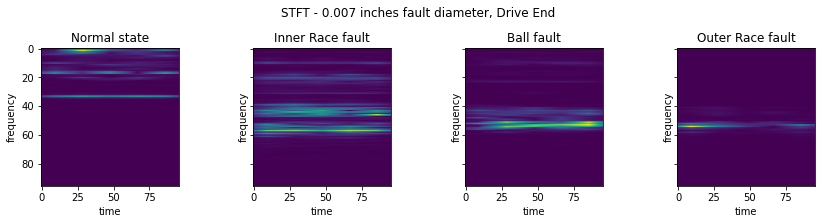

In [18]:

import matplotlib.pyplot as plt
fig, (plt1, plt2, plt3, plt4) = plt.subplots(1, 4, sharey = True, figsize=(12,3), constrained_layout=True)

plt1.set_xlabel("time")
plt1.set_ylabel("frequency")
plt1.set_title('Normal state')
plt1.imshow(generate_spectrogram_image(normal_data_chunk_DE_train[3], (96,96)))              # One chunk out of n number of chunks created used for generating the image(3rd chunk actually here)

plt2.set_xlabel("time")
plt2.set_ylabel("frequency")
plt2.set_title('Inner Race fault')
plt2.imshow(generate_spectrogram_image(ir_data_chunk_007_DE_train[3], (96,96)))

plt3.set_xlabel("time")
plt3.set_ylabel("frequency")
plt3.set_title('Ball fault')
plt3.imshow(generate_spectrogram_image(b_data_chunk_007_DE_train[3], (96,96)))

plt4.set_xlabel("time")
plt4.set_ylabel("frequency")
plt4.set_title('Outer Race fault')
plt4.imshow(generate_spectrogram_image(or_data_chunk_007_DE_train[3], (96,96)))

fig.suptitle('STFT - 0.007 inches fault diameter, Drive End')
fig.show()

### 3. Image creating and Data shuffling

♦ Several images are created that are going to be used to train the CNN. 

♦ Some functions are needed to help in creating the folders in which the images will be stored and to label correctly the files generated, depending on the parameters chosen, such as position, image_type, image_shape, etc.

♦ A random shuffling is done between the chunks at this stage, to avoid that the CNN gets trained on images that are of adjacent time windows.

♦ Also a Directory is created for putting the created and loaded images



In [19]:
def try_make_directories():                                                  # Creating two new folder named in the data_directories
    data_directories = ["dataset", "npy_dataset"]
    for directory in data_directories:
        try:
            os.makedirs(f'./{directory}')
        except OSError as e:
            if e.errno != errno.EEXIST:
                raise

In [20]:
from tqdm.notebook import tqdm                                                                         #For Progress bar
from enum import Enum
#
def create_image_by_label_database(
        position,
        data_for,
        image_types,
        image_shape,
        shuffle_across_time=True,
        overwrite_existing_file=False):

    try_make_directories()                                                 #creating the directories

    filename_for_images_by_labels = npy_dataset_filename(
        position,
        data_for,
        image_types,
        image_shape,
        shuffle_across_time
    )

    if overwrite_existing_file is False:
        import os
        if os.path.isfile(filename_for_images_by_labels):
            print(
                "File already exists. Use 'overwrite_existing_file' if you wish to regenerate and overwrite it. Bye.")
            return
#   
    if position == "DE":
      if data_for == "train":
        len_n = np.shape(normal_data_chunk_DE_train)[0]
        len_b_007 = np.shape(b_data_chunk_007_DE_train)[0]
        len_b_014 = np.shape(b_data_chunk_014_DE_train)[0]
        len_b_021 = np.shape(b_data_chunk_021_DE_train)[0]
        len_ir_007 = np.shape(ir_data_chunk_007_DE_train)[0]
        len_ir_014 = np.shape(ir_data_chunk_014_DE_train)[0]
        len_ir_021 = np.shape(ir_data_chunk_021_DE_train)[0]
        len_or_007 = np.shape(or_data_chunk_007_DE_train)[0]
        len_or_014 = np.shape(or_data_chunk_014_DE_train)[0]
        len_or_021 = np.shape(or_data_chunk_021_DE_train)[0]
        len_data = min(len_n, len_b_007, len_b_014, len_b_021, len_ir_007, len_ir_014, len_ir_021, len_or_007, len_or_014, len_or_021, number_of_chunks)
      
        normal_data = normal_data_chunk_DE_train
        b_data_007 = b_data_chunk_007_DE_train
        b_data_014 = b_data_chunk_014_DE_train 
        b_data_021 = b_data_chunk_021_DE_train
        ir_data_007 = ir_data_chunk_007_DE_train
        ir_data_014 = ir_data_chunk_014_DE_train
        ir_data_021 = ir_data_chunk_021_DE_train
        or_data_007 = or_data_chunk_007_DE_train
        or_data_014 = or_data_chunk_014_DE_train
        or_data_021 = or_data_chunk_021_DE_train
      
      elif data_for == "test":
        len_n = np.shape(normal_data_chunk_DE_test)[0]
        len_b_007 = np.shape(b_data_chunk_007_DE_test)[0]
        len_b_014 = np.shape(b_data_chunk_014_DE_test)[0]
        len_b_021 = np.shape(b_data_chunk_021_DE_test)[0]
        len_ir_007 = np.shape(ir_data_chunk_007_DE_test)[0]
        len_ir_014 = np.shape(ir_data_chunk_014_DE_test)[0]
        len_ir_021 = np.shape(ir_data_chunk_021_DE_test)[0]
        len_or_007 = np.shape(or_data_chunk_007_DE_test)[0]
        len_or_014 = np.shape(or_data_chunk_014_DE_test)[0]
        len_or_021 = np.shape(or_data_chunk_021_DE_test)[0]
        len_data = min(len_n, len_b_007, len_b_014, len_b_021, len_ir_007, len_ir_014, len_ir_021, len_or_007, len_or_014, len_or_021, number_of_chunks)
      
        normal_data = normal_data_chunk_DE_test
        b_data_007 = b_data_chunk_007_DE_test
        b_data_014 = b_data_chunk_014_DE_test 
        b_data_021 = b_data_chunk_021_DE_test
        ir_data_007 = ir_data_chunk_007_DE_test
        ir_data_014 = ir_data_chunk_014_DE_test
        ir_data_021 = ir_data_chunk_021_DE_test
        or_data_007 = or_data_chunk_007_DE_test
        or_data_014 = or_data_chunk_014_DE_test
        or_data_021 = or_data_chunk_021_DE_test

      if shuffle_across_time:
          # so the first N chunks will be taken at random time from the whole time window
          np.random.shuffle(normal_data)
          np.random.shuffle(b_data_007)
          np.random.shuffle(b_data_014)
          np.random.shuffle(b_data_021)
          np.random.shuffle(ir_data_007)
          np.random.shuffle(ir_data_014)
          np.random.shuffle(ir_data_021)
          np.random.shuffle(or_data_007)
          np.random.shuffle(or_data_014)
          np.random.shuffle(or_data_021) 
        
      images_by_labels = {'n': [], 'b_0.007inch': [], 'b_0.014inch': [], 'b_0.021inch': [],'ir_0.007inch': [], 'ir_0.014inch': [], 'ir_0.021inch': [], 'or_0.007inch': [], 'or_0.014inch': [], 'or_0.021inch': []}
      #display(int(len_data))
      #1
      for i in tqdm(range(int(len_n))):
          #display(len(normal_data), normal_data[i].shape)
          n_images = generate_rgba_images_from_data(normal_data[i], image_shape, image_types)

          images_by_labels['n'].extend(n_images)
      #2
      for i in tqdm(np.arange(len_b_007)):    
          b_images_007 = generate_rgba_images_from_data(b_data_007[i], image_shape, image_types)
        
          images_by_labels['b_0.007inch'].extend(b_images_007)
      #3
      for i in tqdm(np.arange(len_b_014)):    
          b_images_014 = generate_rgba_images_from_data(b_data_014[i], image_shape, image_types)
        
          images_by_labels['b_0.014inch'].extend(b_images_014)
      #4
      for i in tqdm(np.arange(len_b_021)):    
          b_images_021 = generate_rgba_images_from_data(b_data_021[i], image_shape, image_types)
        
          images_by_labels['b_0.021inch'].extend(b_images_021)
      #5
      for i in tqdm(np.arange(len_ir_007)):
          ir_images_007 = generate_rgba_images_from_data(ir_data_007[i], image_shape, image_types)
        
          images_by_labels['ir_0.007inch'].extend(ir_images_007)
      #6
      for i in tqdm(np.arange(len_ir_014)):
          ir_images_014 = generate_rgba_images_from_data(ir_data_014[i], image_shape, image_types)
        
          images_by_labels['ir_0.014inch'].extend(ir_images_014)
      #7
      for i in tqdm(np.arange(len_ir_021)):    
          ir_images_021 = generate_rgba_images_from_data(ir_data_021[i], image_shape, image_types)
          
          images_by_labels['ir_0.021inch'].extend(ir_images_021)
      #8
      for i in tqdm(np.arange(len_or_007)):    
          or_images_007 = generate_rgba_images_from_data(or_data_007[i], image_shape, image_types)
        
          images_by_labels['or_0.007inch'].extend(or_images_007)
      #9
      for i in tqdm(np.arange(len_or_014)):    
          or_images_014 = generate_rgba_images_from_data(or_data_014[i], image_shape, image_types)
        
          images_by_labels['or_0.014inch'].extend(or_images_014)
      #10
      for i in tqdm(np.arange(len_or_021)):    
          or_images_021 = generate_rgba_images_from_data(or_data_021[i], image_shape, image_types)
        
          images_by_labels['or_0.021inch'].extend(or_images_021)


    print(f'Saving {filename_for_images_by_labels}')
    np.save(f'{filename_for_images_by_labels}', images_by_labels)
    
    
        
#Giving appropraite names to the files created according to their respective attributes

def npy_dataset_filename(
        position,
        data_for,
        image_types,
        image_shape,
        shuffle_across_time):
    filename_suffix = \
        (f'_Position_{position}') + \
        (f'_DataFor_{data_for}') + \
        f'_types{"-".join([str(t)[10:12] for t in image_types])}' + \
        (f'_timeshuffled' if shuffle_across_time else '') + \
        f'_shape{image_shape[0]}-{image_shape[1]}'
    filename = f'./npy_dataset/images_by_labels_for_cnn{filename_suffix}.npy'
    return filename


#Generating RGBA images using the function created earlier

def generate_rgba_images_from_data(
        vector_y_data,
        image_shape,
        image_types):
    images = []
    if ImageType.SPECTROGRAM in image_types:
        images.append(generate_spectrogram_image(vector_y_data, image_shape))

    images_rgba = ary_to_rgba(images)

    return images_rgba

def ary_to_rgba(ary, nchannels=1):
    from matplotlib import cm                        #A mixin class to map scalar data to RGBA.The ScalarMappable applies data normalization before returning RGBA colors from the given colormap.

    ary_dim = (np.shape(ary))

    im = np.empty(shape=(ary_dim[0], ary_dim[1], ary_dim[2], nchannels)).astype('uint8')
    for i in np.arange(0, len(ary)):
        im[i, :] = np.log(ary[i] + 1e-6).reshape(ary_dim[0], ary_dim[1], ary_dim[2], nchannels)
    return im
#

class ImageType(Enum):
    SCALOGRAM = 1
    SPECTROGRAM = 2
    QTRANSFORM = 3

### 3 .1 Creating the Images using the above function



#### ♦ Image Creation for train data set

In [21]:
create_image_by_label_database(
    position="DE", 
    data_for = "train",
    image_types=[ImageType.SPECTROGRAM], 
    image_shape=(96, 96), 
    shuffle_across_time=True,
    overwrite_existing_file=True)


Saving ./npy_dataset/images_by_labels_for_cnn_Position_DE_DataFor_train_typesSP_timeshuffled_shape96-96.npy


#### Image Creation for test data set

In [22]:
create_image_by_label_database(
    position="DE", 
    data_for = "test",
    image_types=[ImageType.SPECTROGRAM], 
    image_shape=(96, 96), 
    shuffle_across_time=True,
    overwrite_existing_file=True)


Saving ./npy_dataset/images_by_labels_for_cnn_Position_DE_DataFor_test_typesSP_timeshuffled_shape96-96.npy


### 4. Preparing Train-Test Data

♦  Now to define a function that loads the images that were generated.

#### 4.4.1 Loading the images created above

In [23]:
def load_images_by_labels_by_params(
        position,
        data_for,
        image_types ,
        image_shape,
        chunks_are_shuffled_across_time=True):
    filename = npy_dataset_filename(
        position,
        data_for,
        image_types,
        image_shape,
        chunks_are_shuffled_across_time)

    loaded = np.load(filename, allow_pickle=True)
    print(f"Successfully loaded file {filename}")
    return loaded.item()                                     # item() gets the actual dictionary from the loaded object

♦ With the aid of the previous function the images for DE Train data is loaded

In [24]:
position = "DE"
data_for = "train"
image_types=[ImageType.SPECTROGRAM]
image_shape = (96, 96)
shuffle_chunks_across_time=True

images_by_labels_for_cnn_train = load_images_by_labels_by_params(
    position=position,
    data_for = data_for,    
    image_types=image_types, 
    image_shape=image_shape,
    chunks_are_shuffled_across_time=shuffle_chunks_across_time)

Successfully loaded file ./npy_dataset/images_by_labels_for_cnn_Position_DE_DataFor_train_typesSP_timeshuffled_shape96-96.npy


♦ With the aid of the previous function the images for DE Test data is loaded

In [25]:
position = "DE"
data_for = "test"
image_types=[ImageType.SPECTROGRAM]
image_shape = (96, 96)
shuffle_chunks_across_time=True

images_by_labels_for_cnn_test = load_images_by_labels_by_params(
    position=position,
    data_for = data_for,    
    image_types=image_types, 
    image_shape=image_shape,
    chunks_are_shuffled_across_time=shuffle_chunks_across_time)

Successfully loaded file ./npy_dataset/images_by_labels_for_cnn_Position_DE_DataFor_test_typesSP_timeshuffled_shape96-96.npy


#### ♦ Now to see the Dimensions of the Images created by us, We use the below Code Block

In [26]:


#To get the key's present in of both the dicts(loaded images actually)

display(images_by_labels_for_cnn_train.keys())
display(images_by_labels_for_cnn_test.keys())

# Just to cross check if they are indeed dictionaries

display(type(images_by_labels_for_cnn_train))
display(type(images_by_labels_for_cnn_test))

# Checking the shape of DE Train data for 007 inch fault

display(np.shape(images_by_labels_for_cnn_train['n']))
display(np.shape(images_by_labels_for_cnn_train['b_0.007inch']))
display(np.shape(images_by_labels_for_cnn_train['ir_0.007inch']))
display(np.shape(images_by_labels_for_cnn_train['or_0.007inch']))

# Checking the shape of DE Test data for 007 inch fault

display(np.shape(images_by_labels_for_cnn_test['n']))
display(np.shape(images_by_labels_for_cnn_test['b_0.007inch']))
display(np.shape(images_by_labels_for_cnn_test['ir_0.007inch']))
display(np.shape(images_by_labels_for_cnn_test['or_0.007inch']))

dict_keys(['n', 'b_0.007inch', 'b_0.014inch', 'b_0.021inch', 'ir_0.007inch', 'ir_0.014inch', 'ir_0.021inch', 'or_0.007inch', 'or_0.014inch', 'or_0.021inch'])

dict_keys(['n', 'b_0.007inch', 'b_0.014inch', 'b_0.021inch', 'ir_0.007inch', 'ir_0.014inch', 'ir_0.021inch', 'or_0.007inch', 'or_0.014inch', 'or_0.021inch'])

dict

dict

(1273, 96, 96, 1)

(365, 96, 96, 1)

(366, 96, 96, 1)

(1098, 96, 96, 1)

(141, 96, 96, 1)

(40, 96, 96, 1)

(40, 96, 96, 1)

(122, 96, 96, 1)

### 4.4.2 Image separation i.e. Data Preparation

♦ Now, We  transform the data to be suitable for the CNN input:

1. The images and their labels need to be separated into two arrays, correlated by their indices


2. The labels are to be one-hot encoded (i.e. label "N" becomes (0,0,0,0,0,0,0,0,0,1))(To convert the cateogrical attributes into number for our model to understand)


In [27]:
#from Zipfile import zip
#import zip
from itertools import zip_longest

def separate_images_from_labels(images_by_labels, interleave: bool):
    all_labels = list(images_by_labels.keys())
    
    NB_CLASSES = len(all_labels)
    all_labels_onehot = np.identity(NB_CLASSES).astype('uint8')                                     #identity matrix representing categories in binary value
    label_to_onehot_mapper = {all_labels[i]: all_labels_onehot[i] for i in np.arange(NB_CLASSES)}   #mapping label name to its encoded value and storing in dict

    all_images_for_cnn = []
    all_labels_for_cnn_onehot = []

    for key in all_labels:
        images = images_by_labels[key]
        labels_onehot = np.full(shape=(len(images), NB_CLASSES), fill_value=label_to_onehot_mapper[key]) # just getting labels for the same key of images

        all_images_for_cnn.append(images)
        all_labels_for_cnn_onehot.append(labels_onehot)

    if interleave:
        all_images_for_cnn = lists_interleave(all_images_for_cnn)
        all_labels_for_cnn_onehot = lists_interleave(all_labels_for_cnn_onehot)
    else:  # flatten the lists
        all_images_for_cnn = [image for sublist in all_images_for_cnn for image in sublist]
        all_labels_for_cnn_onehot = [label for sublist in all_labels_for_cnn_onehot for label in sublist]

    return np.array(all_images_for_cnn), np.array(all_labels_for_cnn_onehot)
                               
def lists_interleave(lists):
    return [val for tup in zip(*lists) for val in tup]

#The last step before training is to separate the images and labels. Then to separate the images and their corresponding labels.

In [28]:
images_train, labels_train_onehot = separate_images_from_labels(images_by_labels_for_cnn_train, interleave=False)
images_test, labels_test_onehot = separate_images_from_labels(images_by_labels_for_cnn_test, interleave=False)

In [29]:
images_train

array([[[[250],
         [250],
         [250],
         ...,
         [252],
         [252],
         [252]],

        [[252],
         [252],
         [252],
         ...,
         [253],
         [253],
         [253]],

        [[254],
         [254],
         [254],
         ...,
         [253],
         [253],
         [253]],

        ...,

        [[243],
         [243],
         [243],
         ...,
         [243],
         [243],
         [243]],

        [[243],
         [243],
         [243],
         ...,
         [243],
         [243],
         [243]],

        [[243],
         [243],
         [243],
         ...,
         [243],
         [243],
         [243]]],


       [[[253],
         [253],
         [253],
         ...,
         [253],
         [253],
         [252]],

        [[255],
         [  0],
         [  0],
         ...,
         [255],
         [255],
         [255]],

        [[254],
         [254],
         [254],
         ...,
         [254],
         [

In [30]:
labels_train_onehot

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]], dtype=uint8)

### 4.5 Convolutional Neural Network

♦ The CNN architecture used in this notebook is from the paper Deep Learning Enabled Fault Diagnosis Using Time-Frequency Image  Analysis of Rolling Element Bearings. 





♦ It is a supervised classification problem, with 10 classes. A Convolutional Neural Network (CNN) is implemented as a Sequential Keras model. 

♦ The images that were previously generated, form a tuple (number of images, x dpi, y dpi, number of channels). 

♦The loss function is categorical cross-entropy, the optimizer is ADAM and Leaky RELU activation function after each Convolution layer. 

In [31]:
from keras import optimizers

## input data parameters
IMAGES_SHAPE = (96, 96, 1)
PADDING = 'same'
KERNEL_SIZE = (3, 3)
KERNEL_INITIALIZER = 'glorot_normal'
# parameters for deep layers
NUMBER_OF_CLASSES = 10  # N, B 0.007inch, B 0.014inch, B 0.021inch, IR 0.007inch, IR 0.014inch, IR 0.021inch, OR 0.007inch, OR 0.014inch and OR 0.021inch  
DROPOUT = 0.2
LEAK_ALPHA = 0.1
MAX_POOLING_POOL_SIZE = (2, 2)
ACTIVATION_LAYER_FUNCTION = 'softmax'
# loss and optimizer
LOSS_FUNCTION = 'categorical_crossentropy'
LEARNING_RATE = 0.001
OPTIMIZER = optimizers.Adam(LEARNING_RATE, epsilon=10e-6)

In [32]:
from keras import regularizers

In [33]:
import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import LeakyReLU
from keras import metrics


# CNN architecture from Guo et al.
model = Sequential()
model.add(Conv2D(32, KERNEL_SIZE,                  
                 input_shape=IMAGES_SHAPE,
                 data_format='channels_last',
                 kernel_initializer=KERNEL_INITIALIZER,                 
                 padding=PADDING))

model.add(LeakyReLU(LEAK_ALPHA))

model.add(Conv2D(32, KERNEL_SIZE, 
                 kernel_initializer=KERNEL_INITIALIZER,
                 padding=PADDING))

model.add(LeakyReLU(LEAK_ALPHA))
model.add(MaxPooling2D(pool_size=MAX_POOLING_POOL_SIZE))
model.add(Dropout(0.4))

model.add(Conv2D(64, KERNEL_SIZE, 
                 kernel_initializer=KERNEL_INITIALIZER,
                 padding=PADDING))

model.add(LeakyReLU(LEAK_ALPHA))

model.add(Conv2D(64, KERNEL_SIZE, 
                 kernel_initializer=KERNEL_INITIALIZER,
                 padding=PADDING))

model.add(LeakyReLU(LEAK_ALPHA))
model.add(MaxPooling2D(pool_size=MAX_POOLING_POOL_SIZE))
model.add(Dropout(0.4))

model.add(Conv2D(128, KERNEL_SIZE, 
                 kernel_initializer=KERNEL_INITIALIZER,
                 padding=PADDING))

model.add(LeakyReLU(LEAK_ALPHA))

model.add(Conv2D(128, KERNEL_SIZE, 
                 kernel_initializer=KERNEL_INITIALIZER,
                 padding=PADDING))

model.add(LeakyReLU(LEAK_ALPHA))
model.add(MaxPooling2D(pool_size=MAX_POOLING_POOL_SIZE))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(100))
model.add(LeakyReLU(LEAK_ALPHA))
model.add(Dense(100))
model.add(LeakyReLU(LEAK_ALPHA))
model.add(Dropout(DROPOUT))
model.add(Dense(NUMBER_OF_CLASSES))
model.add(Activation(ACTIVATION_LAYER_FUNCTION))
  
model.compile(loss=LOSS_FUNCTION, 
              optimizer=OPTIMIZER,
              metrics=[metrics.categorical_accuracy])  
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 96, 96, 32)        320       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 96, 96, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 96, 32)        9248      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 96, 96, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 48, 48, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 48, 64)        1

### 4.5.2 Training the CNN

The train for CNN is with a validation split of 10%-90% train and test respectively of the *image batch size* and over 100 epochs. The CNN will be then tested on the hold-out data. 


In [34]:
BATCH_SIZE = 32
NUMBER_OF_EPOCHS = 12

history = model.fit(
    images_train, labels_train_onehot,
    batch_size=BATCH_SIZE,
    epochs=NUMBER_OF_EPOCHS, 
    validation_data=(images_test, labels_test_onehot), 
    verbose=1)

Epoch 1/12
189/189 [==============================] - 264s 1s/step - loss: 10.2816 - categorical_accuracy: 0.2410 - val_loss: 1.1507 - val_categorical_accuracy: 0.5203
Epoch 2/12
189/189 [==============================] - 240s 1s/step - loss: 0.7566 - categorical_accuracy: 0.7353 - val_loss: 0.4180 - val_categorical_accuracy: 0.8496
Epoch 3/12
189/189 [==============================] - 232s 1s/step - loss: 0.5161 - categorical_accuracy: 0.8134 - val_loss: 0.4025 - val_categorical_accuracy: 0.8496
Epoch 4/12
189/189 [==============================] - 231s 1s/step - loss: 0.4379 - categorical_accuracy: 0.8396 - val_loss: 0.3790 - val_categorical_accuracy: 0.8496
Epoch 5/12
189/189 [==============================] - 245s 1s/step - loss: 0.4103 - categorical_accuracy: 0.8441 - val_loss: 0.3901 - val_categorical_accuracy: 0.8436
Epoch 6/12
189/189 [==============================] - 231s 1s/step - loss: 0.3564 - categorical_accuracy: 0.8592 - val_loss: 0.3380 - val_categorical_accuracy: 0.86

### 5.Train-Test Accuracy and Loss curves

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])


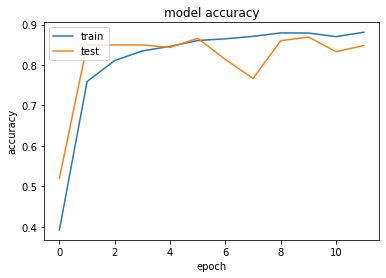

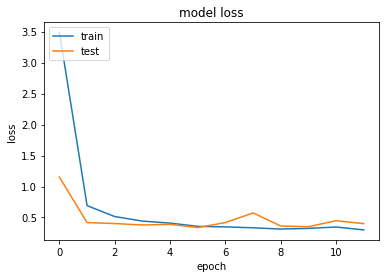

In [35]:
import matplotlib.pyplot as plt

# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### 6.Test the CNN
Once the model has been fitted, we assess its precision through a classical one vs many confusion matrix

In [36]:
#labels_predicted = history.model.predict_classes(images_test, verbose=1)
labels_predicted = np.argmax(history.model.predict(images_test), axis=-1)

In [37]:
# for the confusion matrix we need a factorized labels 
# [1,0,0,0,0,0,0,0,0,0] -> 0 ("N")
# [0,1,0,0,0,0,0,0,0,0] -> 1 ("B 0.007inch") 
# [0,0,1,0,0,0,0,0,0,0] -> 2 ("B 0.014inch")
# [0,0,0,1,0,0,0,0,0,0] -> 3 ("B 0.021inch") 
# [0,0,0,0,1,0,0,0,0,0] -> 4 ("IR 0.007inch")
# [0,0,0,0,0,1,0,0,0,0] -> 5 ("IR 0.014inch")
# [0,0,0,0,0,0,1,0,0,0] -> 6 ("IR 0.021inch") 
# [0,0,0,0,0,0,0,1,0,0] -> 7 ("OR 0.007inch") 
# [0,0,0,0,0,0,0,0,1,0] -> 8 ("OR 0.014inch") 
# [0,0,0,0,0,0,0,0,0,1] -> 9 ("OR 0.021inch") 

labels_test_factorized = [(1*label[0]+2*label[1]+3*label[2]+4*label[3]+5*label[4]+6*label[5]+7*label[6]+8*label[7]+9*label[8]+10*label[9])-1 for label in labels_test_onehot]

from sklearn.metrics import classification_report
print(classification_report(labels_test_factorized, labels_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       141
           1       0.24      0.25      0.24        40
           2       0.74      0.80      0.77        40
           3       0.57      0.42      0.49        40
           4       0.95      1.00      0.98        40
           5       1.00      0.85      0.92        40
           6       1.00      0.82      0.90        40
           7       0.80      0.83      0.81       122
           8       0.76      0.85      0.80        40
           9       0.95      1.00      0.98       122

    accuracy                           0.85       665
   macro avg       0.80      0.78      0.79       665
weighted avg       0.85      0.85      0.85       665

